In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('pet_sales.csv')
df.tail(5)

,product_id,product_category,sales,price,vendor_id,pet_size,pet_type,rating,re_buy
874,4999,Snack,"$27,000",146.93,VC_1564,medium,bird,6,0
875,4243,Snack,"$76,000",174.07,VC_808,medium,hamster,8,0
876,4783,Snack,"$162,000",224.12,VC_1348,medium,cat,7,1
877,4664,Bedding,"$34,000",199.15,VC_1229,large,dog,10,1
878,4850,Toys,"$54,000",171.85,VC_1415,small,dog,1,1


In [3]:
#check any duplicate records
df.duplicated().sum()

0

In [4]:
df.info()
# no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   product_id        879 non-null    int64  
 1   product_category  879 non-null    object 
 2   sales             879 non-null    object 
 3   price             879 non-null    float64
 4   vendor_id         879 non-null    object 
 5   pet_size          879 non-null    object 
 6   pet_type          879 non-null    object 
 7   rating            879 non-null    int64  
 8   re_buy            879 non-null    int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 61.9+ KB


In [5]:
##Transform sales column
#remove $ and comma; change string to int

df['sales'] = df['sales'].str.replace('[$,]','').astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   product_id        879 non-null    int64  
 1   product_category  879 non-null    object 
 2   sales             879 non-null    int64  
 3   price             879 non-null    float64
 4   vendor_id         879 non-null    object 
 5   pet_size          879 non-null    object 
 6   pet_type          879 non-null    object 
 7   rating            879 non-null    int64  
 8   re_buy            879 non-null    int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 61.9+ KB


In [6]:
##Filter out other pet types
#create list for type of pets
suitable_type = ['cat','dog','fish','bird']

#filter dataframe based on above list & reset index
df = df[df['pet_type'].isin(suitable_type)]

df.shape
#row number decreased by 46

(833, 9)

In [7]:
#Get products that are purchased more than once

df2 = df.groupby('re_buy')[['product_category']].count().reset_index()
df2.columns = ['Repurchase','Count']
df2

,Repurchase,Count
0,0,443
1,1,390


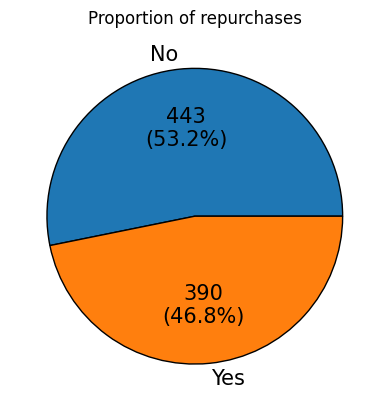

In [8]:
#Show proportion
plt.pie(df2['Count'],labels=['No','Yes'],autopct= (lambda p: '{:.0f}\n({:.1f}%)'.format((p * df2.Count.sum() / 100),p)),
        wedgeprops={'edgecolor':'k'},textprops={'size':15})

plt.title('Proportion of repurchases');

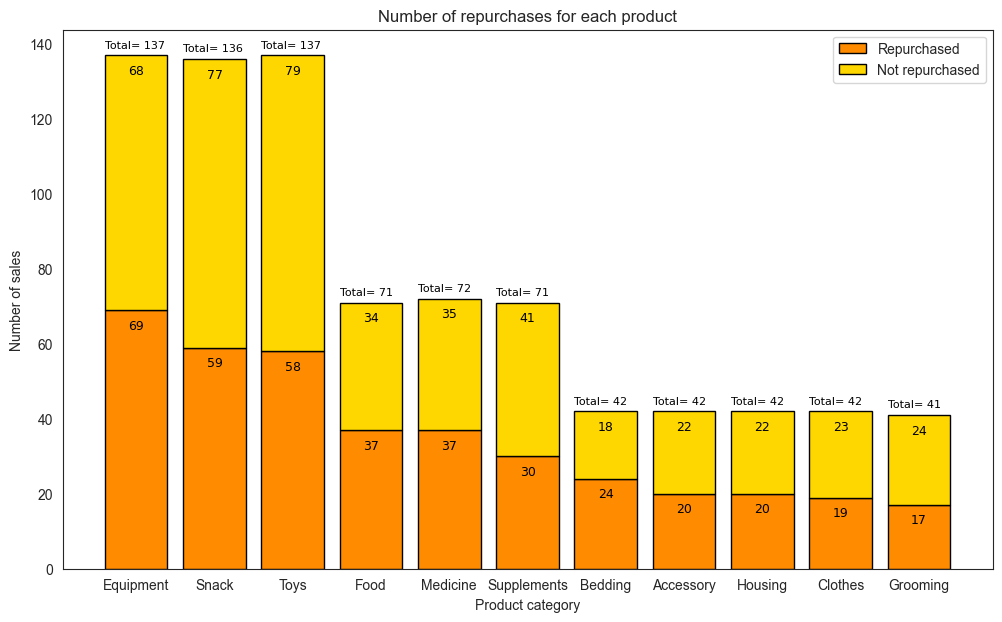

In [9]:
grp = df.groupby('product_category')[['re_buy']].value_counts().reset_index(name='count')

rb_1 = grp[['product_category','count']][grp['re_buy']==1]
rb_0 = grp[['product_category','count']][grp['re_buy']==0]

sns.set_style('white')
fig=plt.figure(figsize=(12,7))

unstack_df = pd.merge(rb_1,rb_0,on='product_category')
unstack_df.columns =['Category','Repurchase','No repurchase']
unstack_df = unstack_df.sort_values(by="Repurchase",ascending=False)
unstack_df['Total'] = unstack_df['Repurchase'] + unstack_df['No repurchase']

plt.bar(x=unstack_df['Category'],height=unstack_df['Repurchase'],color='darkorange',edgecolor='k')
plt.bar(x=unstack_df['Category'],height=unstack_df['No repurchase'],bottom=unstack_df['Repurchase'],color='gold',edgecolor='k')

plt.ylabel('Number of sales')
plt.xlabel('Product category')

plt.legend(['Repurchased','Not repurchased'],bbox_to_anchor=(1,1))
plt.title('Number of repurchases for each product')

for n, x in enumerate([*unstack_df.index.values]):
    
    #label repurchased portion
    for (num_sales, y_loc) in zip(unstack_df[['Repurchase']].loc[x],unstack_df[['Repurchase']].loc[x].cumsum()):               
        plt.text(x=n-0.1,y=y_loc-5,s=f'{np.round(num_sales, 1)}',color="black",fontsize=9,fontfamily='consolas')
    
    #label not repurchased portion
    for (num_sales, y_loc) in zip(unstack_df[['No repurchase']].loc[x],(unstack_df['No repurchase'].loc[x]+unstack_df['Repurchase'].loc[x]).cumsum()): 
        plt.text(x=n-0.1,y=y_loc-5,s=f'{np.round(num_sales, 1)}',color="black",fontsize=9,fontfamily='consolas')
        
    #label total number of sales
    for (num_sales, y_loc) in zip((unstack_df[['Total']].loc[x]),(unstack_df['No repurchase'].loc[x]+unstack_df['Repurchase'].loc[x]).cumsum()): 
        plt.text(x=n-0.4,y=y_loc+2,s=f'Total= {np.round(num_sales, 1)}',color="black",fontsize=8,fontfamily='consolas');  


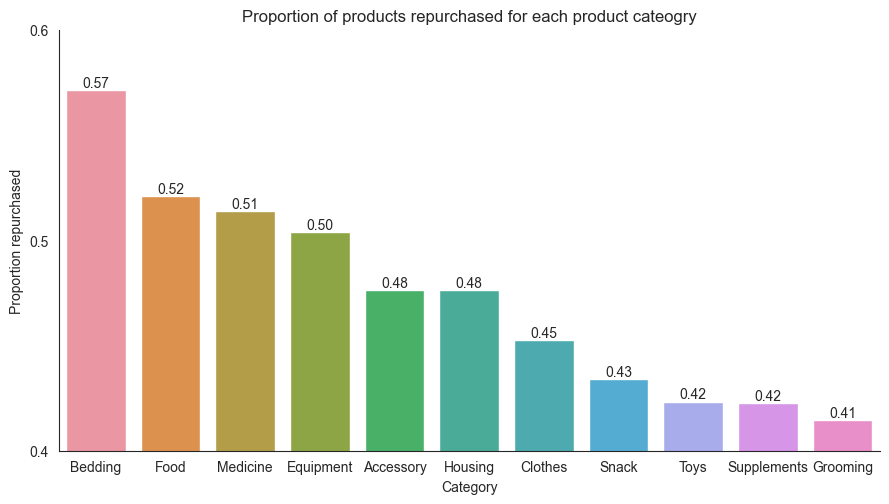

In [10]:
unstack_df['proportion'] = unstack_df['Repurchase']/unstack_df['Total']
prop_desc = unstack_df.sort_values(by='proportion',ascending=False)['Category']

p = sns.catplot(x='Category',y='proportion',data=unstack_df,kind='bar',order=prop_desc,height=5,aspect=1.8)
plt.ylim(0.4,0.6)
plt.yticks((np.arange(0.4,0.7,0.1)))
plt.ylabel('Proportion repurchased')
plt.title('Proportion of products repurchased for each product cateogry')

ax=p.facet_axis(0,0)
for c in ax.containers:
    labels = [f'{(v.get_height()):.2f}' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge');


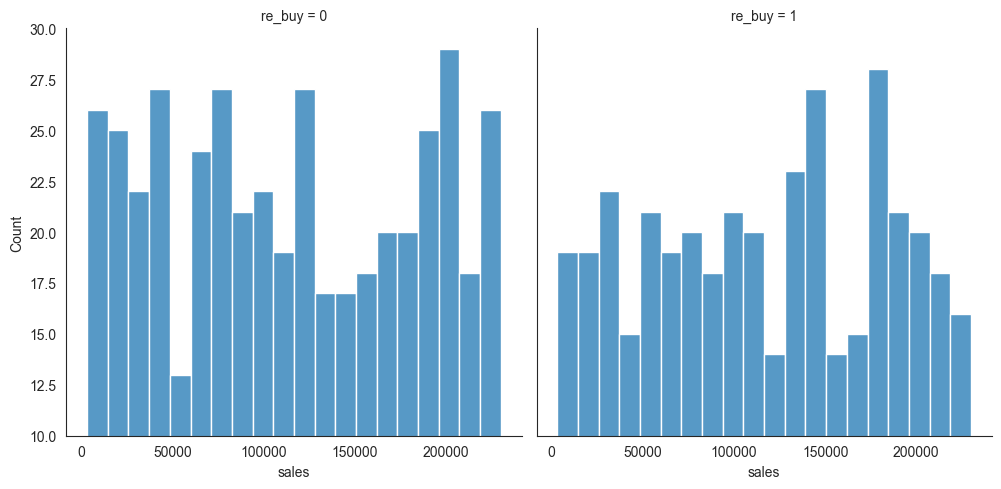

In [11]:
sales_1 = df[['sales','product_category']][df['re_buy']==1]
sales_0 = df[['sales','product_category']][df['re_buy']==0]

sns.displot(x='sales',kind='hist',data=df,col='re_buy',bins=20)
plt.ylim(10,30);

In [12]:
#get mean,median,standard deviation of sales for each group
a = df.groupby('re_buy')[['sales']].agg([np.mean,np.median,np.std])

'''
values are close to each other
'''

a

sales                        
                 mean    median           std
re_buy                                       
0       115406.320542  116000.0  67746.080054
1       116889.743590  117500.0  64750.266924

In [13]:
total_sales = df.groupby('re_buy')[['sales']].sum()
total_sales = total_sales/1e7

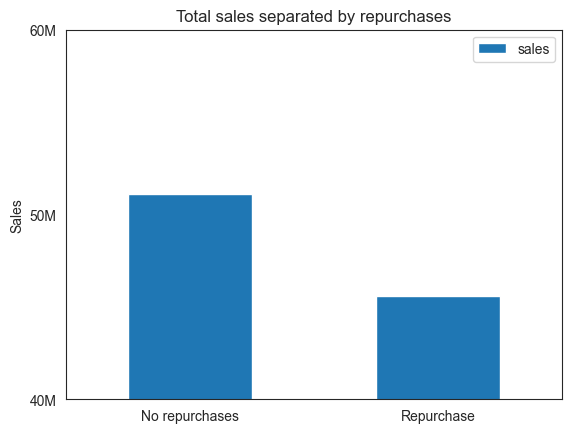

In [14]:
sns.set_style('white')
total_sales.plot.bar()
plt.xticks(ticks=[0,1],labels=['No repurchases','Repurchase'],rotation='horizontal')
plt.yticks(ticks=[i for i in range(1,7)],labels=[str(i) + '0M' for i in range(1,7)])
plt.title('Total sales separated by repurchases')
plt.ylim(4,6)


plt.ylabel('Sales')
plt.xlabel('');

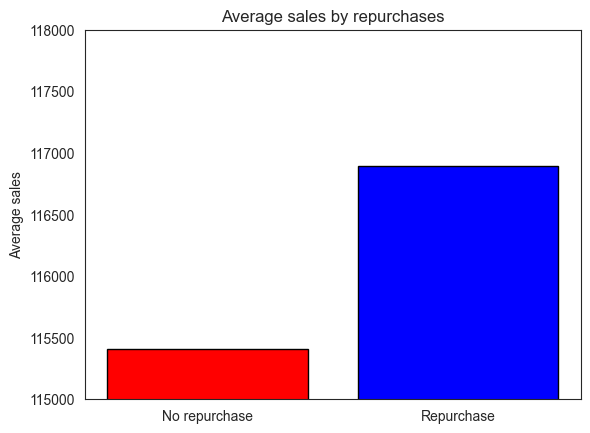

In [15]:
y = total_sales.copy()
y['count'] = df2['Count']
y['sales/count'] = y['sales']/y['count']*1e7

avg_sales = plt.bar(x=y.index,height=y['sales/count'],edgecolor='k',color=['red','blue'])

plt.ylim(115e3,118e3)
plt.xticks(ticks=[0,1],labels=['No repurchase','Repurchase'])
plt.title('Average sales by repurchases')
plt.ylabel('Average sales');

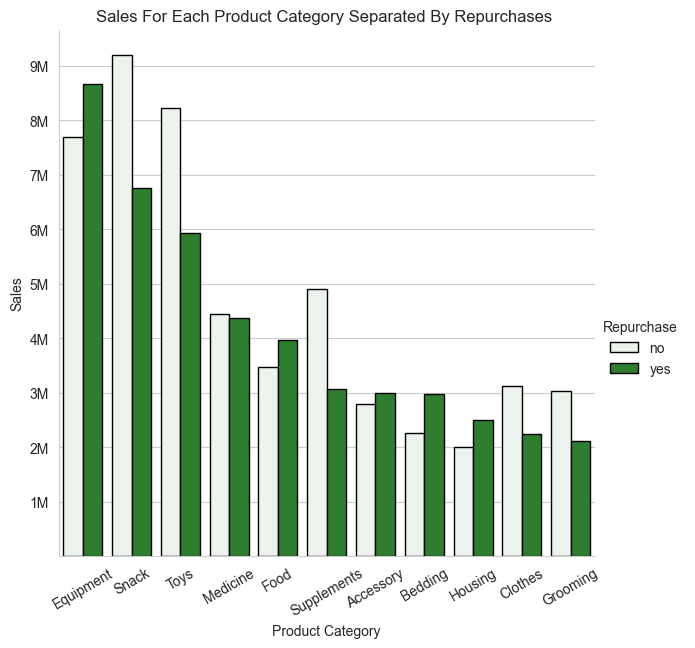

In [16]:
x = df.groupby(['product_category','re_buy'])[['sales']].sum().reset_index()
x = x.sort_values(by=['re_buy','sales'],ascending=[False,False])
x['sales'] = x['sales']/1e6

sns.set_style('whitegrid')
h = sns.catplot(x='product_category',y='sales',hue='re_buy',data=x,kind='bar',height=6,edgecolor='k',color='forestgreen')

plt.yticks(ticks=[i for i in range(1,10)],labels=[str(i) + 'M' for i in range(1,10)])
plt.xticks(rotation=30)

plt.xlabel('Product Category')
plt.ylabel('Sales')
plt.title('Sales For Each Product Category Separated By Repurchases ')
h._legend.set_title('Repurchase')
labels = ['no','yes']

for t, l in zip(h._legend.texts,labels):
    t.set_text(l)
    
plt.setp(h._legend,bbox_to_anchor=(1.05,0.5));

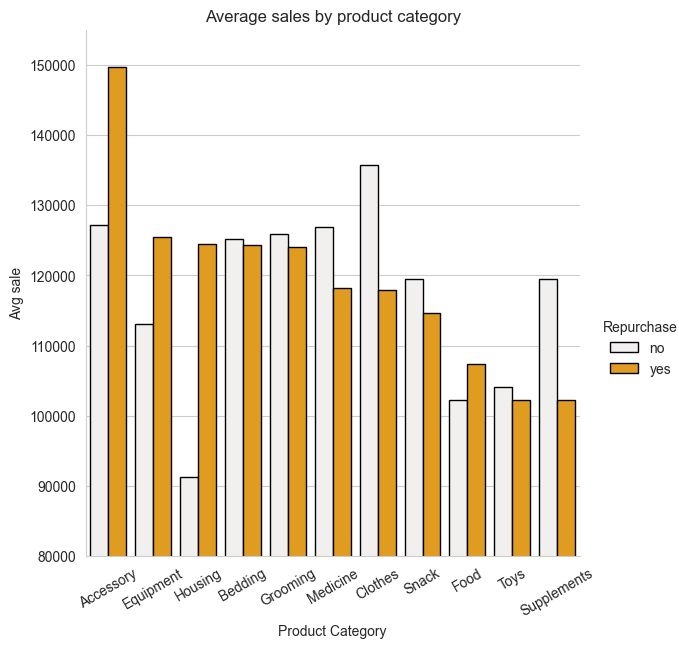

In [17]:
z = df.groupby(['product_category','re_buy'])[['sales']].agg(['sum','count']).reset_index()

z['Avg sale'] = z.iloc[:,2]/z.iloc[:,3]

z= z.sort_values(by=['re_buy','Avg sale'],ascending=[False,False])

g = sns.catplot(x='product_category',y='Avg sale',hue='re_buy',data=z,kind='bar',height=6,edgecolor='k',color='orange')
plt.ylim(8e4,15.5e4)
plt.xticks(rotation=30)
plt.xlabel('Product Category')
plt.title('Average sales by product category')

g._legend.set_title('Repurchase')
labels = ['no','yes']
for t, l in zip(g._legend.texts,labels):
    t.set_text(l)
plt.setp(g._legend,bbox_to_anchor=(1.05,0.5));

In [18]:
top5_repurch_count = unstack_df.iloc[:5,:1].reset_index().drop('index',axis=1)
top5_repurch_prop = unstack_df.sort_values(by='proportion',ascending=False).iloc[:5,[0]].reset_index().drop('index',axis=1)
top5_repurch_sales = x.iloc[:5,[0]].reset_index().drop('index',axis=1)
top5_repurch_avgsales = z.iloc[:5,[0]].reset_index().drop('index',axis=1)



col_name = ['count','proportion','total sales','average sales']


summary = pd.concat([top5_repurch_count,top5_repurch_prop,top5_repurch_sales,top5_repurch_avgsales],axis=1)
summary.columns = col_name
summary = summary.reset_index()
summary['rank'] = summary['index'] + 1
summary = summary.set_index('rank')
summary = summary.drop('index',axis=1)
summary.iloc[:,2:]

,total sales,average sales
rank,,
1,Equipment,Accessory
2,Snack,Equipment
3,Toys,Housing
4,Medicine,Bedding
5,Food,Grooming


In [19]:
top5_repurch_count_nr = unstack_df.sort_values(by='No repurchase',ascending=False).iloc[:5,[0]].reset_index().drop('index',axis=1)
top5_repurch_prop_nr = unstack_df.sort_values(by='proportion',ascending=True).iloc[:5,[0]].reset_index().drop('index',axis=1)
top5_repurch_sales_nr = x.iloc[11:16,[0]].reset_index().drop('index',axis=1)
top5_repurch_avgsales_nr = z.iloc[11:16,[0]].reset_index().drop('index',axis=1)

summary_0 = pd.concat([top5_repurch_count_nr,top5_repurch_prop_nr,top5_repurch_sales_nr,top5_repurch_avgsales_nr],axis=1)
summary_0.columns = col_name
summary_0 = summary_0.reset_index()
summary_0['rank'] = summary_0['index'] + 1
summary_0 = summary_0.set_index('rank')
summary_0 = summary_0.drop('index',axis=1)
summary_0.iloc[:,2:]

,total sales,average sales
rank,,
1,Snack,Clothes
2,Toys,Accessory
3,Equipment,Medicine
4,Supplements,Grooming
5,Medicine,Bedding


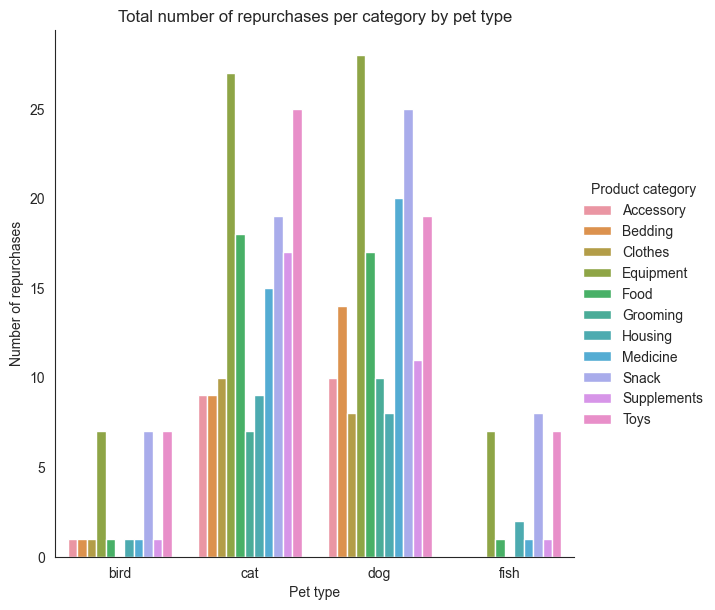

In [96]:
sns.set_style('white')
cat_pettype = df.groupby(['product_category','pet_type'])[['re_buy']].sum().reset_index().sort_values(by='product_category')
ax = sns.catplot(x='pet_type',y='re_buy',hue='product_category',data=cat_pettype,kind='bar',height=6)

plt.ylabel('Number of repurchases')
plt.xlabel('Pet type')
plt.title('Total number of repurchases per category by pet type')
ax._legend.set_title('Product category');

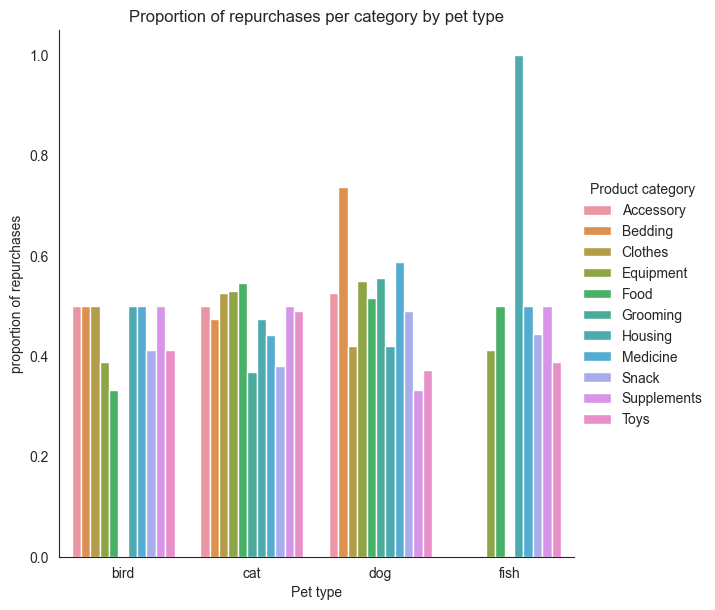

In [98]:
v = cat_pettype.sort_values(by=['pet_type','product_category'])
w = df.groupby(['pet_type','product_category'])[['re_buy']].count().reset_index()
w = w.rename({'re_buy':'total number of sale'},axis=1)
w =pd.merge(v,w)
w['proportion'] = w['re_buy']/w['total number of sale']
w = w.sort_values(by='product_category')

ax1 = sns.catplot(x='pet_type',y='proportion',hue='product_category',data=w,kind='bar',height=6,order=['bird','cat','dog','fish'])

plt.ylabel('proportion of repurchases')
plt.xlabel('Pet type')
plt.title('Proportion of repurchases per category by pet type')
ax1._legend.set_title('Product category');